In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 100
sns.set_theme(style='darkgrid', palette='viridis')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv(r'glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
df['Type'].nunique()

6

In [6]:
df.shape

(214, 10)

In [7]:
x = df.iloc[:,:-1]
y = df['Type']

In [8]:
#The size of the sample is less so to increase the sample size, we are using RandomOverSampler

from imblearn.over_sampling import RandomOverSampler 

ros = RandomOverSampler(random_state=42)
x_sample,y_sample= ros.fit_resample(x,y)

In [9]:
x_sample.shape

(456, 9)

In [10]:
y_sample.shape

(456,)

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(x_sample,y_sample,test_size=0.2,random_state=42)

In [12]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
ypred

array([6, 3, 5, 1, 3, 7, 5, 2, 6, 1, 2, 5, 2, 6, 6, 2, 5, 5, 7, 1, 2, 2,
       3, 2, 3, 7, 2, 5, 1, 3, 6, 3, 7, 2, 7, 2, 5, 5, 1, 1, 6, 2, 7, 2,
       3, 2, 1, 3, 7, 5, 3, 1, 3, 5, 6, 7, 1, 6, 1, 7, 5, 2, 1, 7, 5, 1,
       7, 6, 5, 7, 5, 6, 3, 6, 7, 7, 1, 6, 7, 2, 6, 5, 6, 1, 1, 7, 7, 2,
       2, 1, 3, 3], dtype=int64)

In [13]:
knn.score(xtrain,ytrain), knn.score(xtest,ytest)

(0.9203296703296703, 0.8913043478260869)

Here we got oerfitted model, so we are doing hyperparameter tuning to get generalized model

# Hyper parameter tuning

In [14]:
trainacc =[]
testacc=[]

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    trainacc.append(knn.score(xtrain,ytrain))
    testacc.append(knn.score(xtest,ytest))

In [15]:
trainacc

[1.0,
 0.9560439560439561,
 0.9203296703296703,
 0.8983516483516484,
 0.8791208791208791,
 0.8543956043956044,
 0.8434065934065934,
 0.8241758241758241,
 0.8186813186813187]

In [16]:
testacc

[0.9456521739130435,
 0.9347826086956522,
 0.8913043478260869,
 0.8804347826086957,
 0.8804347826086957,
 0.8695652173913043,
 0.8586956521739131,
 0.8152173913043478,
 0.8152173913043478]

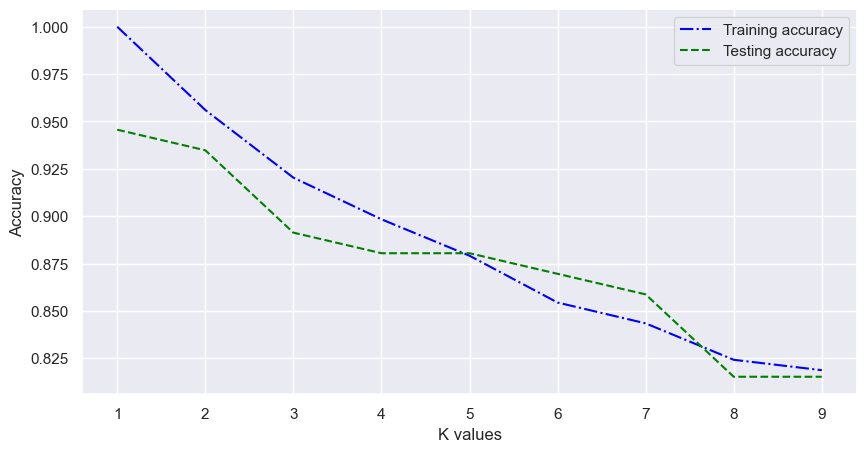

In [17]:
plt.plot(range(1,10), trainacc, linestyle = '-.', color='blue', label = 'Training accuracy')
plt.plot(range(1,10), testacc, linestyle='--', color='green', label='Testing accuracy')
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.legend()

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
knn.score(xtrain,ytrain), knn.score(xtest,ytest)

(0.8791208791208791, 0.8804347826086957)

In [19]:
from sklearn.metrics import classification_report

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.85      0.65      0.73        17
           2       0.88      0.79      0.83        19
           3       0.62      1.00      0.77        10
           5       0.93      1.00      0.97        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.88        92
   macro avg       0.88      0.90      0.88        92
weighted avg       0.90      0.88      0.88        92

